In [9]:
import pandas as pd
import numpy as np
import re

import seaborn as sns
import matplotlib.pyplot as plt

In [16]:
da = pd.read_csv(r'C:\Users\Janvi\Desktop\important\SEM-1(Mtech)\WebMining-Group15\MBTI 500.csv') 

In [3]:
da

,posts,type
0,know intj tool use interaction people excuse a...,INTJ
1,rap music ehh opp yeah know valid well know fa...,INTJ
2,preferably p hd low except wew lad video p min...,INTJ
3,drink like wish could drink red wine give head...,INTJ
4,space program ah bad deal meing freelance max ...,INTJ
...,...,...
106062,stay frustrate world life want take long nap w...,INFP
106063,fizzle around time mention sure mistake thing ...,INFP
106064,schedule modify hey w intp strong wing underst...,INFP
106065,enfj since january busy schedule able spend li...,INFP


C:\Users\Janvi\.ipython\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


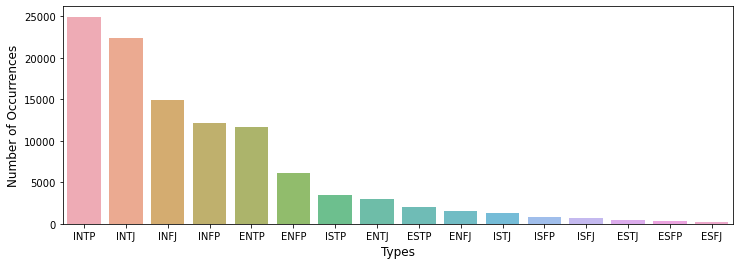

In [4]:
per_types = da['type'].value_counts()

plt.figure(figsize=(12,4))
sns.barplot(per_types.index, per_types.values, alpha=0.8)
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Types', fontsize=12)
plt.show()

In [6]:
from sklearn.preprocessing import LabelEncoder
l = LabelEncoder()
l.fit(da['type'])
LabelEncoder()
print(list(l.classes_))

['ENFJ', 'ENFP', 'ENTJ', 'ENTP', 'ESFJ', 'ESFP', 'ESTJ', 'ESTP', 'INFJ', 'INFP', 'INTJ', 'INTP', 'ISFJ', 'ISFP', 'ISTJ', 'ISTP']


In [7]:
da['label'] = l.transform(da["type"])

In [8]:
#distributing data into different classes
from sklearn.utils import resample

#dividing labels into diffrent dataframe 
df_0=da[da['label']==0]
df_1=da[da['label']==1]
df_2=da[da['label']==2]
df_3=da[da['label']==3]
df_4=da[da['label']==4]
df_5=da[da['label']==5]
df_6=da[da['label']==6]
df_7=da[da['label']==7]
df_8=da[da['label']==8]
df_9=da[da['label']==9]
df_10=da[da['label']==10]
df_11=da[da['label']==11]
df_12=da[da['label']==12]
df_13=da[da['label']==13]
df_14=da[da['label']==14]
df_15=da[da['label']==15]


#sampaling/balancing data
n_sample=2000
df_0_b = resample(df_0, replace=True, n_samples=n_sample, random_state=42)
df_1_b = resample(df_1, replace=True, n_samples=n_sample, random_state=42)
df_2_b = resample(df_2, replace=False, n_samples=n_sample, random_state=42)
df_3_b = resample(df_3, replace=False, n_samples=n_sample, random_state=42)
df_4_b = resample(df_4, replace=True, n_samples=n_sample, random_state=42)
df_5_b = resample(df_5, replace=True, n_samples=n_sample, random_state=42)
df_6_b = resample(df_6, replace=True, n_samples=n_sample, random_state=42)
df_7_b = resample(df_7, replace=True, n_samples=n_sample, random_state=42)
df_8_b = resample(df_8, replace=False, n_samples=n_sample, random_state=42)
df_9_b = resample(df_9, replace=False, n_samples=n_sample, random_state=42)
df_10_b = resample(df_10, replace=False, n_samples=n_sample, random_state=42)
df_11_b = resample(df_11, replace=False, n_samples=n_sample, random_state=42)
df_12_b = resample(df_12, replace=True, n_samples=n_sample, random_state=42)
df_13_b = resample(df_13, replace=True, n_samples=n_sample, random_state=42)
df_14_b = resample(df_14, replace=True, n_samples=n_sample, random_state=42)
df_15_b = resample(df_15, replace=False, n_samples=n_sample, random_state=42)




In [11]:
data_c = pd.concat([df_0_b,df_1_b,df_2_b,df_3_b,df_4_b,df_5_b,df_6_b,df_7_b,df_8_b,df_9_b,df_10_b,df_11_b,df_12_b,df_13_b,df_14_b,df_15_b])

In [12]:
data_c.shape

(32000, 3)

In [14]:
def get_types(row):
    t=row['type']

    I = 0; N = 0
    T = 0; J = 0
    
    if t[0] == 'I': I = 1
    elif t[0] == 'E': I = 0
    else: print('I-E incorrect')
        
    if t[1] == 'N': N = 1
    elif t[1] == 'S': N = 0
    else: print('N-S incorrect')
        
    if t[2] == 'T': T = 1
    elif t[2] == 'F': T = 0
    else: print('T-F incorrect')
        
    if t[3] == 'J': J = 1
    elif t[3] == 'P': J = 0
    else: print('J-P incorrect')
    return pd.Series( {'IE':I, 'NS':N , 'TF': T, 'JP': J }) 

data_c = (data_c.apply (lambda row: get_types (row),axis=1))
data_c

,IE,NS,TF,JP
34,1,1,1,1
35,1,1,1,1
44,1,1,1,1
119,1,1,1,1
133,1,1,1,1
...,...,...,...,...
106039,1,1,0,0
106054,1,1,0,0
106055,1,1,0,0
106058,1,1,0,0


In [13]:
print(da['type'].value_counts())

INTP    24961
INTJ    22427
INFJ    14963
INFP    12134
ENTP    11725
ENFP     6167
ISTP     3424
ENTJ     2955
ESTP     1986
ENFJ     1534
ISTJ     1243
ISFP      875
ISFJ      650
ESTJ      482
ESFP      360
ESFJ      181
Name: type, dtype: int64


In [14]:
from sklearn.preprocessing import LabelEncoder
l = LabelEncoder()
l.fit(da['type'])
LabelEncoder()
print(list(l.classes_))

['ENFJ', 'ENFP', 'ENTJ', 'ENTP', 'ESFJ', 'ESFP', 'ESTJ', 'ESTP', 'INFJ', 'INFP', 'INTJ', 'INTP', 'ISFJ', 'ISFP', 'ISTJ', 'ISTP']


In [15]:
da['label'] = l.transform(da["type"])

In [16]:
da

,posts,type,IE,NS,TF,JP,label
0,know intj tool use interaction people excuse a...,INTJ,1,1,1,1,10
1,rap music ehh opp yeah know valid well know fa...,INTJ,1,1,1,1,10
2,preferably p hd low except wew lad video p min...,INTJ,1,1,1,1,10
3,drink like wish could drink red wine give head...,INTJ,1,1,1,1,10
4,space program ah bad deal meing freelance max ...,INTJ,1,1,1,1,10
...,...,...,...,...,...,...,...
106062,stay frustrate world life want take long nap w...,INFP,1,1,0,0,9
106063,fizzle around time mention sure mistake thing ...,INFP,1,1,0,0,9
106064,schedule modify hey w intp strong wing underst...,INFP,1,1,0,0,9
106065,enfj since january busy schedule able spend li...,INFP,1,1,0,0,9


In [17]:
#distributing data into different classes
from sklearn.utils import resample

#dividing labels into diffrent dataframe 
df_0=da[da['label']==0]
df_1=da[da['label']==1]
df_2=da[da['label']==2]
df_3=da[da['label']==3]
df_4=da[da['label']==4]
df_5=da[da['label']==5]
df_6=da[da['label']==6]
df_7=da[da['label']==7]
df_8=da[da['label']==8]
df_9=da[da['label']==9]
df_10=da[da['label']==10]
df_11=da[da['label']==11]
df_12=da[da['label']==12]
df_13=da[da['label']==13]
df_14=da[da['label']==14]
df_15=da[da['label']==15]


#sampaling/balancing data
n_sample=2000
df_0_b = resample(df_0, replace=True, n_samples=n_sample, random_state=42)
df_1_b = resample(df_1, replace=True, n_samples=n_sample, random_state=42)
df_2_b = resample(df_2, replace=False, n_samples=n_sample, random_state=42)
df_3_b = resample(df_3, replace=False, n_samples=n_sample, random_state=42)
df_4_b = resample(df_4, replace=True, n_samples=n_sample, random_state=42)
df_5_b = resample(df_5, replace=True, n_samples=n_sample, random_state=42)
df_6_b = resample(df_6, replace=True, n_samples=n_sample, random_state=42)
df_7_b = resample(df_7, replace=True, n_samples=n_sample, random_state=42)
df_8_b = resample(df_8, replace=False, n_samples=n_sample, random_state=42)
df_9_b = resample(df_9, replace=False, n_samples=n_sample, random_state=42)
df_10_b = resample(df_10, replace=False, n_samples=n_sample, random_state=42)
df_11_b = resample(df_11, replace=False, n_samples=n_sample, random_state=42)
df_12_b = resample(df_12, replace=True, n_samples=n_sample, random_state=42)
df_13_b = resample(df_13, replace=True, n_samples=n_sample, random_state=42)
df_14_b = resample(df_14, replace=True, n_samples=n_sample, random_state=42)
df_15_b = resample(df_15, replace=False, n_samples=n_sample, random_state=42)




In [18]:
data_c = pd.concat([df_0_b,df_1_b,df_2_b,df_3_b,df_4_b,df_5_b,df_6_b,df_7_b,df_8_b,df_9_b,df_10_b,df_11_b,df_12_b,df_13_b,df_14_b,df_15_b])

In [19]:
data_c.shape

(32000, 7)

In [20]:
print(data_c['type'].value_counts())

ENFJ    2000
ENFP    2000
ENTJ    2000
ENTP    2000
ESFJ    2000
ESFP    2000
ESTJ    2000
ESTP    2000
INFJ    2000
INFP    2000
INTJ    2000
INTP    2000
ISFJ    2000
ISFP    2000
ISTJ    2000
ISTP    2000
Name: type, dtype: int64


In [21]:
print ("Introversion (I) /  Extroversion (E):\t", data_c['IE'].value_counts()[0], " / ", data_c['IE'].value_counts()[1])
print ("Intuition (N) / Sensing (S):\t\t", data_c['NS'].value_counts()[0], " / ", data_c['NS'].value_counts()[1])
print ("Thinking (T) / Feeling (F):\t\t", data_c['TF'].value_counts()[0], " / ", data_c['TF'].value_counts()[1])
print ("Judging (J) / Perceiving (P):\t\t", data_c['JP'].value_counts()[0], " / ", data_c['JP'].value_counts()[1])

Introversion (I) /  Extroversion (E):	 16000  /  16000
Intuition (N) / Sensing (S):		 16000  /  16000
Thinking (T) / Feeling (F):		 16000  /  16000
Judging (J) / Perceiving (P):		 16000  /  16000


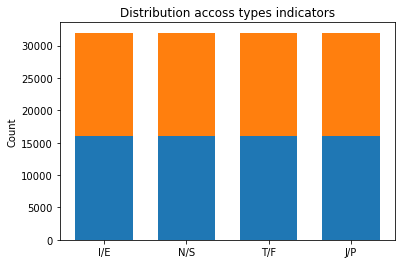

In [22]:
N = 4
but = (data_c['IE'].value_counts()[0], data_c['NS'].value_counts()[0], data_c['TF'].value_counts()[0], data_c['JP'].value_counts()[0])
top = (data_c['IE'].value_counts()[1], data_c['NS'].value_counts()[1], data_c['TF'].value_counts()[1], data_c['JP'].value_counts()[1])

ind = np.arange(N)    # the x locations for the groups
width = 0.7      # the width of the bars: can also be len(x) sequence

p1 = plt.bar(ind, but, width)
p2 = plt.bar(ind, top, width, bottom=but)

plt.ylabel('Count')
plt.title('Distribution accoss types indicators')
plt.xticks(ind, ('I/E',  'N/S', 'T/F', 'J/P',))

plt.show()

In [23]:
corr=data_c[['IE','NS','TF','JP']].corr()

<AxesSubplot:title={'center':'Pearson Features Correlation'}>

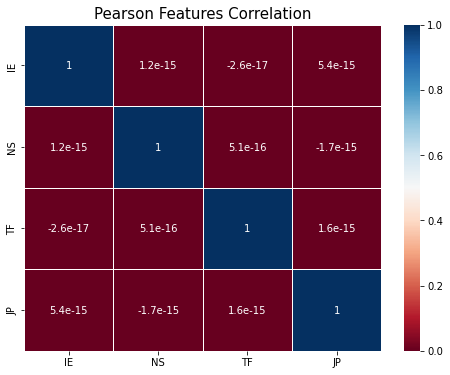

In [24]:
cmap = plt.cm.RdBu
plt.figure(figsize=(8,6))
plt.title('Pearson Features Correlation', size=15)
sns.heatmap(corr, cmap=cmap,  annot=True, linewidths=1)

In [25]:
b_Pers = {'I':0, 'E':1, 'N':0, 'S':1, 'F':0, 'T':1, 'J':0, 'P':1}
b_Pers_list = [{0:'I', 1:'E'}, {0:'N', 1:'S'}, {0:'F', 1:'T'}, {0:'J', 1:'P'}]

def translate_personality(personality):
    # transform mbti to binary vector
    
    return [b_Pers[l] for l in personality]

def translate_back(personality):
    # transform binary vector to mbti personality

    s = ""
    for i, l in enumerate(personality):
        s += b_Pers_list[i][l]
    return s

d = data_c.head(10)
print(d)
list_personality_bin = np.array([translate_personality(p) for p in d.type])
print("Binarize MBTI list: \n%s" % list_personality_bin)

                                                   posts  type  IE  NS  TF  \
54706  people equally judge prove much bad person peo...  ENFJ   0   1   0   
55039  ask want know know tell well sort people lol a...  ENFJ   0   1   0   
54440  something interest say generally worry underst...  ENFJ   0   1   0   
54874  sometimes u youngathanacius say weakness touch...  ENFJ   0   1   0   
54710  know identity principle literally definition f...  ENFJ   0   1   0   
54675  like theosophy considerable importance astrolo...  ENFJ   0   1   0   
54624  like relation intp infp usually mark easy disc...  ENFJ   0   1   0   
53701  ixxps general go quite hand people affair cont...  ENFJ   0   1   0   
54046  opposite effect usually spread several month b...  ENFJ   0   1   0   
54818  get attention give attention affection upvote ...  ENFJ   0   1   0   

       JP  label  
54706   1      0  
55039   1      0  
54440   1      0  
54874   1      0  
54710   1      0  
54675   1      0  
54624   

In [26]:
import nltk
nltk.download("stopwords")
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Janvi\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Janvi\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\Janvi\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [27]:
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.corpus import stopwords 
from nltk import word_tokenize

# We want to remove these from the posts
unique_type_list = ['INFJ', 'ENTP', 'INTP', 'INTJ', 'ENTJ', 'ENFJ', 'INFP', 'ENFP',
       'ISFP', 'ISTP', 'ISFJ', 'ISTJ', 'ESTP', 'ESFP', 'ESTJ', 'ESFJ']
  
unique_type_list = [x.lower() for x in unique_type_list]

# Lemmatize
stemmer = PorterStemmer()
lemmatiser = WordNetLemmatizer()

# Cache the stop words for speed 
cachedStopWords = stopwords.words("english")

def pre_process_data(data, remove_stop_words=True, remove_mbti_profiles=True):

    list_personality = []
    list_posts = []
    len_data = len(data_c)
    i=0
    
    for row in data.iterrows():
        i+=1
        if (i % 10000 == 0 or i == 1 or i == len_data):
            print("%s of %s rows" % (i, len_data))

        # Remove and clean posts
        posts = row[1].posts
        temp = re.sub('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|(?:%[0-9a-fA-F][0-9a-fA-F]))+', ' ', posts)
        temp = re.sub("[^a-zA-Z]", " ", temp)
        temp = re.sub(' +', ' ', temp).lower()
        if remove_stop_words:
            temp = " ".join([lemmatiser.lemmatize(w) for w in temp.split(' ') if w not in cachedStopWords])
        else:
            temp = " ".join([lemmatiser.lemmatize(w) for w in temp.split(' ')])
            
        if remove_mbti_profiles:
            for t in unique_type_list:
                temp = temp.replace(t,"")

        type_labelized = translate_personality(row[1].type)
        list_personality.append(type_labelized)
        list_posts.append(temp)

    list_posts = np.array(list_posts)
    list_personality = np.array(list_personality)
    return list_posts, list_personality

In [28]:
list_posts, list_personality  = pre_process_data(data_c, remove_stop_words=True)

1 of 32000 rows
10000 of 32000 rows
20000 of 32000 rows
30000 of 32000 rows
32000 of 32000 rows


In [29]:
print("Num posts and personalities: ",  list_posts.shape, list_personality.shape)

Num posts and personalities:  (32000,) (32000, 4)


In [30]:
list_posts[1]

'ask want know know tell well sort people lol acquaintance meet person consider friend take initiative friend converse sometimes razvan well two s say actually s xd yes lol one kickboxing  actually show lot  opposite xd many friend barely even feel need involve someone else life fact tell friend one point seem talk yep actually tell one  friend start clingy one day suddenly stop talk talk often take generally  song may describe s well cameo lover kimbra go way s guard tend keep emotion one  one  like lol keep detach let fuss thing idk show also life bother  ton animal love dog shih tzu cannot let go breed super high maintenance dog groom properly use two relationship  year start friend progress relationship though fast calm stable relationship yeah feel might ness happy point yeah shop sale friend mine want shop window shop awww avatar cute smart little girl wisdom far beyond age ongue base  ldr show action month never sure never assume something else tell want j high five vacation fam

In [31]:
list_personality[1]

array([1, 0, 0, 0])

In [32]:
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.manifold import TSNE

# Posts to a matrix of token counts
countizer = CountVectorizer(analyzer="word", max_features=1500, tokenizer=None, preprocessor=None, stop_words=None,max_df=0.7,min_df=0.1) 

# Learn the vocabulary dictionary and return term-document matrix
print("CountVectorizer...")
X_cnt = countizer.fit_transform(list_posts)

# Transform the count matrix to a normalized tf or tf-idf representation
tfizer = TfidfTransformer()

print("Tf-idf...")
# Learn the idf vector (fit) and transform a count matrix to a tf-idf representation
X_tfidf =  tfizer.fit_transform(X_cnt).toarray()

CountVectorizer...
Tf-idf...


In [33]:
feature_names = list(enumerate(countizer.get_feature_names()))
feature_names

C:\Users\Janvi\.ipython\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


[(0, 'ability'),
 (1, 'able'),
 (2, 'absolutely'),
 (3, 'accept'),
 (4, 'accurate'),
 (5, 'across'),
 (6, 'act'),
 (7, 'action'),
 (8, 'activity'),
 (9, 'actual'),
 (10, 'actually'),
 (11, 'add'),
 (12, 'advice'),
 (13, 'affect'),
 (14, 'age'),
 (15, 'ago'),
 (16, 'agree'),
 (17, 'ahough'),
 (18, 'allow'),
 (19, 'almost'),
 (20, 'alone'),
 (21, 'along'),
 (22, 'already'),
 (23, 'amaze'),
 (24, 'amount'),
 (25, 'amp'),
 (26, 'angry'),
 (27, 'annoy'),
 (28, 'another'),
 (29, 'answer'),
 (30, 'anxiety'),
 (31, 'anymore'),
 (32, 'anyone'),
 (33, 'anything'),
 (34, 'anyway'),
 (35, 'apply'),
 (36, 'appreciate'),
 (37, 'approach'),
 (38, 'area'),
 (39, 'argue'),
 (40, 'argument'),
 (41, 'around'),
 (42, 'art'),
 (43, 'ask'),
 (44, 'aspect'),
 (45, 'assume'),
 (46, 'attention'),
 (47, 'avoid'),
 (48, 'aware'),
 (49, 'away'),
 (50, 'awesome'),
 (51, 'back'),
 (52, 'bad'),
 (53, 'balance'),
 (54, 'base'),
 (55, 'basically'),
 (56, 'become'),
 (57, 'begin'),
 (58, 'behavior'),
 (59, 'behind'),
 

In [34]:
print("X: Posts in tf-idf representation \n* 1st row:\n%s" % X_tfidf[0])

X: Posts in tf-idf representation 
* 1st row:
[0.         0.         0.         0.10532106 0.         0.
 0.         0.         0.         0.         0.05416415 0.
 0.         0.06197321 0.         0.         0.03629258 0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.07833966 0.09058324 0.04936865 0.
 0.         0.         0.         0.         0.10725018 0.03038324
 0.         0.         0.         0.         0.         0.05366384
 0.         0.         0.05395873 0.         0.03048906 0.
 0.11887141 0.         0.03759915 0.         0.         0.
 0.         0.         0.03050836 0.         0.         0.
 0.         0.         0.04657346 0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.0559789  0.0353758  0.         0.         0.      

In [35]:
type_indicators = [ "IE: Introversion (I) / Extroversion (E)", "NS: Intuition (N) / Sensing (S)", 
                   "FT: Feeling (F) / Thinking (T)", "JP: Judging (J) / Perceiving (P)"  ]

for l in range(len(type_indicators)):
    print(type_indicators[l])

IE: Introversion (I) / Extroversion (E)
NS: Intuition (N) / Sensing (S)
FT: Feeling (F) / Thinking (T)
JP: Judging (J) / Perceiving (P)


In [36]:
print("MBTI row: %s" % translate_back(list_personality[30000,:]))
print("Y: Binarized MBTI row: %s" % list_personality[30000,:])

MBTI row: ISTP
Y: Binarized MBTI row: [0 1 1 1]


In [37]:
# First XGBoost model for MBTI dataset
from numpy import loadtxt
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Posts in tf-idf representation
X = X_tfidf

# Let's train type indicator individually
for l in range(len(type_indicators)):
    print("%s ..." % (type_indicators[l]))
    
    # Let's train type indicator individually
    Y = list_personality[:,l]

    # split data into train and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=1211)

    # fit model on training data
    model = XGBClassifier()
    model.fit(X_train, y_train)

    # make predictions for test data
    y_pred = model.predict(X_test)
    predictions = [round(value) for value in y_pred]
    # evaluate predictions
    accuracy = accuracy_score(y_test, predictions)
    print("* %s Accuracy: %.2f%%" % (type_indicators[l], accuracy * 100.0))

IE: Introversion (I) / Extroversion (E) ...
* IE: Introversion (I) / Extroversion (E) Accuracy: 80.36%
NS: Intuition (N) / Sensing (S) ...
* NS: Intuition (N) / Sensing (S) Accuracy: 86.25%
FT: Feeling (F) / Thinking (T) ...
* FT: Feeling (F) / Thinking (T) Accuracy: 86.81%
JP: Judging (J) / Perceiving (P) ...
* JP: Judging (J) / Perceiving (P) Accuracy: 79.59%


In [38]:
!pip install snscrape

In [39]:
import snscrape.modules.twitter as snstwitter
import pandas as pn

In [40]:
query='(from:urstrulyachu297) until:2021-01-01 since:2017-01-01'
tweets=[]
limit=5000

for tweet in snstwitter.TwitterSearchScraper(query).get_items():
   if len(tweets) == limit:
     break
   else:
     tweets.append([tweet.date, tweet.username , tweet.content])

df1 = pn.DataFrame(tweets, columns=['Date','User', 'Tweeets'])

 
df1

C:\Users\Janvi\AppData\Local\Temp\ipykernel_14828\807971578.py:9: FutureWarning: username is deprecated, use user.username instead
  tweets.append([tweet.date, tweet.username , tweet.content])


,Date,User,Tweeets
0,2020-12-31 19:19:48+00:00,urstrulyachu297,@jack_aa_bokka Happy new year anna ♥️🥳
1,2020-12-31 19:18:29+00:00,urstrulyachu297,@jack_aa_bokka Hey nuvvu yesesav??\nSame to yo...
2,2020-12-31 19:18:01+00:00,urstrulyachu297,@Pran33Th__18 Happy new year pranee \nOf cours...
3,2020-12-31 18:58:13+00:00,urstrulyachu297,@S10ways @urstrulyMahesh Anna 😂
4,2020-12-31 18:57:44+00:00,urstrulyachu297,@Dasari_MB ♥️U too praveen \nHope we meet soon
...,...,...,...
4995,2020-06-09 10:45:44+00:00,urstrulyachu297,@saimahendradhfm Light teesko \nTrend appudu m...
4996,2020-06-09 10:36:30+00:00,urstrulyachu297,@saimahendradhfm Naku 1K \n5 RTs kuda raavu ht...
4997,2020-06-09 10:35:43+00:00,urstrulyachu297,@Gopalsmarter @chary_shravani @urstrulychinna1...
4998,2020-06-09 10:33:44+00:00,urstrulyachu297,@Gopalsmarter @chary_shravani @urstrulychinna1...


In [41]:
data1 = df1.iloc[:,2]
data1

0                  @jack_aa_bokka Happy new year anna ♥️🥳
1       @jack_aa_bokka Hey nuvvu yesesav??\nSame to yo...
2       @Pran33Th__18 Happy new year pranee \nOf cours...
3                         @S10ways @urstrulyMahesh Anna 😂
4          @Dasari_MB ♥️U too praveen \nHope we meet soon
                              ...                        
4995    @saimahendradhfm Light teesko \nTrend appudu m...
4996    @saimahendradhfm Naku 1K \n5 RTs kuda raavu ht...
4997    @Gopalsmarter @chary_shravani @urstrulychinna1...
4998    @Gopalsmarter @chary_shravani @urstrulychinna1...
4999    @Gopalsmarter @chary_shravani @urstrulychinna1...
Name: Tweeets, Length: 5000, dtype: object

In [42]:
my_posts1 = []

for word in data1:
  my_posts1.append(word)

my_posts1  

['@jack_aa_bokka Happy new year anna ♥️🥳',
 '@jack_aa_bokka Hey nuvvu yesesav??\nSame to you too bokka garu 😂🤪',
 '@Pran33Th__18 Happy new year pranee \nOf course we will meet 😎',
 '@S10ways @urstrulyMahesh Anna 😂',
 '@Dasari_MB ♥️U too praveen \nHope we meet soon',
 'Mahesh being your fan was one of the best thing that happened to me....\nAlso because of you I have made beautiful friends...\nYou are just awesome man 🔥😎\n\n@urstrulyMahesh Happy New year 🥳\n#SarkaruVaariPaata',
 '@vyshnavi66666 First person \nHappy new year yshu ♥️',
 '@vyshnavi66666 😂',
 '@vyshnavi66666 That’s awesome \nNee year full party aa 😜',
 '@vyshnavi66666 Thank you for being my friend yshu \nNever thought would make female friends on SM \nBut you were sweet ♥️',
 '@i_r4rehmann @uk_4_you Chudam em ledu https://t.co/jEzZ8Tqd3K',
 '@santoshsuprim Rey emmanna problems untey cheppu \nLet’s get over them together \n\nAlways being happy is the most important thing \nLove you too',
 '@i_r4rehmann @uk_4_you Occheyi \nOk

In [43]:
my_X_cnt1 = countizer.transform(my_posts1)
my_X_tfidf1 =  tfizer.transform(my_X_cnt1).toarray()

In [44]:
# setup parameters for xgboost
param = {}
param['n_estimators'] = 200
param['max_depth'] = 3
param['nthread'] = 8
param['learning_rate'] = 0.2

result1 = []
# Let's train type indicator individually
for l in range(len(type_indicators)):
    print("%s ..." % (type_indicators[l]))
    
    Y = list_personality[:,l]

    # split data into train and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=1212)

    # fit model on training data
    model = XGBClassifier(**param)
    model.fit(X_train, y_train)
    
    # make predictions for my  data
    y_pred1 = model.predict(my_X_tfidf1)
    result1.append(y_pred1[0])
    print("... %s prediction: %s" % (type_indicators[l], y_pred1))

IE: Introversion (I) / Extroversion (E) ...
... IE: Introversion (I) / Extroversion (E) prediction: [1 1 1 ... 1 1 1]
NS: Intuition (N) / Sensing (S) ...
... NS: Intuition (N) / Sensing (S) prediction: [1 1 1 ... 1 1 1]
FT: Feeling (F) / Thinking (T) ...
... FT: Feeling (F) / Thinking (T) prediction: [1 1 1 ... 1 1 1]
JP: Judging (J) / Perceiving (P) ...
... JP: Judging (J) / Perceiving (P) prediction: [0 0 0 ... 0 0 0]


In [45]:
print("The result is: ", translate_back(result1))

The result is:  ESTJ
